## MBAN2 Group 4 A2: Team Assessment



# **Business Analysis Report: Correlation Between Restaurant Location and Proximity to Universities in NYC**

Restaurants in urban settings face intense competition. Proximity to high-traffic areas, such as universities, can influence sales and customer inflow. This report uses data from NYC restaurants and universities to test if geographical proximity to universities correlates with higher sales.

Hypothesis: “Restaurant located near a university is more successful”

The analysis involves:


1.   Plotting restaurant and university locations on a map to visualize spatial relationships.
2.   Checking for outliers in restaurant locations and sales data.
3.   Calculating key descriptive statistics (mean, median, mode, standard deviation, variance).
4.   Evaluating the correlation between proximity to universities and restaurant success.


Exploratory Data Analysis
1. Data Preparation

    Data Cleaning: Pickle files containing orders, restaurants, and items were cleaned and merged. Columns with redundant or irrelevant data were removed. Restaurant names replaced IDs for clarity.

    University Data: A dataset of university names with their geographical coordinates (latitude and longitude) was integrated into the analysis.
2. Geographic Visualization

    Mapping: Restaurant and university locations were plotted using their latitude and longitude values. Universities formed clusters in areas like Manhattan and Brooklyn, while restaurants were more widely distributed.

    Outlier Detection: Outliers in restaurant locations were visually identified, corresponding to those far from city centers or academic zones.
3. Descriptive Statistics

    The number of orders received by restaurants was analyzed to understand distribution and variation:
                Mean: 298,403 orders per restaurant.
                Median: 281,584 orders.
                Mode: 227,445 orders (most common order count).
                Standard Deviation: 62,042 orders, indicating moderate variability.
                Variance: 3,849,285,120, reflecting the dispersion in restaurant sales.
4. Correlation Analysis

  To evaluate the relationship between proximity to universities and restaurant sales:

  Proximity Calculation: The Euclidean distance between each restaurant and the nearest university was calculated.
  
  Correlation Coefficient: A negative correlation coefficient (-0.78) was observed, suggesting that restaurants closer to universities have higher sales.
5. Hourly and Weekly Sales Patterns
  
    Busiest Hours: Orders peaked between 12 PM and 2 PM, aligning with lunch breaks in academic schedules.
    Busiest Days: Fridays and Saturdays saw the highest order volumes, possibly due to weekend socializing.

Insights

  a. Proximity Drives Sales:
  
  Restaurants located within a 2-mile radius of universities exhibited significantly higher sales compared to those further away. This aligns with the hypothesis that proximity to a steady student population boosts business performance.
  
  b. Sales Distribution:
  
  A skewed distribution of sales was observed, with a few restaurants dominating order counts. These were often near popular universities like NYU and Columbia.
  
  c. Popular Items:
  
  Items like "Pizza," "Burgers," and "Coffee" featured prominently among top-sold products, aligning with typical student preferences.

  d. Optimal Operating Times:
  
  Peak sales times were during lunch hours (12 PM–2 PM) and weekends, emphasizing the importance of staffing and inventory management during these periods.

  e. Outlier Detection:
  
  Outliers included restaurants in remote locations or areas with low university density. These typically reported below-average sales.

# 1.   Data upload, cleaning and concatenation


In [1]:
import pandas as pd

## Data Loading Script

- Loads data from pickle files (`orders`, `restaurants`, `items`) into pandas DataFrames.  
- DataFrames are essential for organizing and manipulating data in Python for analysis.  
- Provides the foundation for further data exploration and insights.

 # Files needed:

    *   items.pickle (filepath = /content/items.pickle)
    *   restaurants.pickle (filepath = /content/restaurants.pickle)
    *   orders.pickle (large file) (filepath = /content/orders.pickle)



In [2]:
# Load the pickle files
orders = pd.read_pickle('orders.pickle')
restaurants = pd.read_pickle('restaurants.pickle')
items = pd.read_pickle('items.pickle')

## University Location Data Script

- Loads external university location data (`name`, `latitude`, `longitude`) into a Pandas DataFrame.  
- Facilitates analysis of university locations.  
- Aims to investigate the correlation between university locations and restaurant locations in NYC.


In [3]:
# Data for the DataFrame
import pandas as pd

universities = {
    "University Name": [
        "Columbia University",
        "New York University (NYU)",
        "The City College of New York (CUNY)",
        "Fordham University",
        "Pratt Institute",
        "Pace University",
        "St. John's University",
        "The Juilliard School",
        "Fashion Institute of Technology",
        "Cooper Union"
    ],
    "LAT": [
        40.8075, 40.7291, 40.8201, 40.8622,
        40.6911, 40.7113, 40.7214, 40.7739,
        40.7472, 40.7280
    ],
    "LONG": [
        -73.9626, -73.9965, -73.9496, -73.8856,
        -73.9633, -74.0057, -73.7949, -73.9840,
        -73.9950, -73.9903
    ]
}

# Creating the DataFrame
universities = pd.DataFrame(universities)



## Item Mapping Script

- Creates a mapping from `ITEM_ID` to `ITEM_NAME` for easier data analysis and transformation.  
- Enables replacing `ITEM_ID`s with human-readable `ITEM_NAME`s in the `orders` DataFrame.


In [4]:
# Create a mapping from ITEM_ID to ITEM_NAME
item_mapping = items.set_index('ITEM_ID')['ITEM_NAME']

## ITEM_ID to ITEM_NAME Replacement
- Replace ITEM_IDs with human-readable ITEM_NAMEs in specified columns of the orders DataFrame.
- This improves clarity for data analysis and visualization by using descriptive names instead of IDs.


In [5]:
# Replace the ITEM_IDs in the columns with ITEM_NAME using the mapping
columns_to_replace = ['MAIN', 'BASE', 'SIDE_1', 'SIDE_2']
for column in columns_to_replace:
    orders[column] = orders[column].map(item_mapping)

## Orders and Restaurants Data Merge

- Merges the `orders` and `restaurants` DataFrames based on the `RESTAURANT_ID` column.  
- Enriches the `orders` data with restaurant details for comprehensive analysis.  
- Uses a left merge to retain all order entries and add corresponding restaurant information.


In [6]:
# prompt: How can I connect values using RESTAURANT_ID column to bring the corresponded information from restaurants? I want to bring all columns from restaurants dataframe

# Merge the orders and restaurants DataFrames based on the RESTAURANT_ID column
orders = pd.merge(orders, restaurants, on='RESTAURANT_ID', how='left')

## Removing RESTAURANT_ID Column

- Removes the `RESTAURANT_ID` column from the `orders` DataFrame.  
- Eliminates redundancy after merging with the `restaurants` DataFrame to avoid duplication or confusion.  
- Uses `errors='ignore'` to ensure no error is thrown if `RESTAURANT_ID` is already removed.


In [7]:
# Exclude columns 'DRINKS' and 'COOKIES'
orders = orders.drop(columns=['RESTAURANT_ID'], errors='ignore')

## Column Renaming for Clarity

- Renames the `NAME` column to `RESTAURANT_NAME` for better clarity and understanding.  
- Enhances data readability by using a more descriptive column name.


In [8]:
# prompt: rename NAME to RESTAURANT_NAME

orders = orders.rename(columns={'NAME': 'RESTAURANT_NAME'})

## Review and Validation of Data Frame Structure

*   Re-checking and modifying the data frame columns

In [9]:
# Check DataFrame

orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2387224 entries, 0 to 2387223
Data columns (total 15 columns):
 #   Column           Dtype         
---  ------           -----         
 0   ORDER_ID         object        
 1   DATETIME         datetime64[ns]
 2   TYPE             object        
 3   DRINKS           float64       
 4   COOKIES          float64       
 5   MAIN             object        
 6   BASE             object        
 7   SIDE_1           object        
 8   SIDE_2           object        
 9   RESTAURANT_NAME  object        
 10  ADDRESS          object        
 11  LAT              float64       
 12  LONG             float64       
 13  OPENING_DATE     object        
 14  DELIVERY_START   object        
dtypes: datetime64[ns](1), float64(4), object(10)
memory usage: 273.2+ MB


In [10]:
# Check Data shapes

orders.shape

(2387224, 15)

In [11]:
# Check Data modification

orders.head()

,ORDER_ID,DATETIME,TYPE,DRINKS,COOKIES,MAIN,BASE,SIDE_1,SIDE_2,RESTAURANT_NAME,ADDRESS,LAT,LONG,OPENING_DATE,DELIVERY_START
0,O1820060,2018-10-11 17:25:50,IN_STORE,1.0,2.0,NaN,NaN,NaN,NaN,Midtown,"1379 6th Ave, New York, NY 10019",40.763640,-73.977960,3/19/2013,2018-05-01
1,O1011112,2018-05-31 11:35:00,IN_STORE,0.0,0.0,NaN,NaN,NaN,NaN,Bryant Park,"70 W 40th St, New York, NY 10018",40.752911,-73.983498,5/21/2013,2018-05-01
2,O752854,2018-04-21 18:12:57,DELIVERY,0.0,2.0,Charred Chicken Marketbowl,Farro with Summer Vegetables,Snap Peas,Green Goddess Beans with Sesame,Columbia,"2884 Broadway, New York, NY 10025",40.811470,-73.961230,8/9/2014,2017-01-01
3,O2076864,2018-11-17 12:50:52,PICKUP,1.0,0.0,Charred Chicken Marketbowl,Classic Brown Rice,Jasper Hill Mac & Cheese,Cashew Kale Caesar,Flatiron,"40 W 25th St, New York, NY 10010",40.743600,-73.991070,11/14/2013,2016-03-05
4,O1988898,2018-11-04 18:37:24,IN_STORE,0.0,0.0,Spicy Meatballs Marketbowl,Farro with Summer Vegetables,Jasper Hill Mac & Cheese,Jasper Hill Mac & Cheese,Williamsburg,"45 S 3rd St, Brooklyn, NY 11249",40.713749,-73.965782,10/12/2015,2017-01-01


In [12]:
# prompt: I would like to change data format. OPENING_DATE column, the data is stored such as 3/19/2013 as a object. I would like to change YYYY-MM-DD format and as a datetime.

import pandas as pd

# Convert 'OPENING_DATE' to datetime and desired format
orders['OPENING_DATE'] = pd.to_datetime(orders['OPENING_DATE'], format='%m/%d/%Y', errors='coerce')
orders['OPENING_DATE'] = orders['OPENING_DATE'].dt.strftime('%Y-%m-%d')

orders.head()

,ORDER_ID,DATETIME,TYPE,DRINKS,COOKIES,MAIN,BASE,SIDE_1,SIDE_2,RESTAURANT_NAME,ADDRESS,LAT,LONG,OPENING_DATE,DELIVERY_START
0,O1820060,2018-10-11 17:25:50,IN_STORE,1.0,2.0,NaN,NaN,NaN,NaN,Midtown,"1379 6th Ave, New York, NY 10019",40.763640,-73.977960,2013-03-19,2018-05-01
1,O1011112,2018-05-31 11:35:00,IN_STORE,0.0,0.0,NaN,NaN,NaN,NaN,Bryant Park,"70 W 40th St, New York, NY 10018",40.752911,-73.983498,2013-05-21,2018-05-01
2,O752854,2018-04-21 18:12:57,DELIVERY,0.0,2.0,Charred Chicken Marketbowl,Farro with Summer Vegetables,Snap Peas,Green Goddess Beans with Sesame,Columbia,"2884 Broadway, New York, NY 10025",40.811470,-73.961230,2014-08-09,2017-01-01
3,O2076864,2018-11-17 12:50:52,PICKUP,1.0,0.0,Charred Chicken Marketbowl,Classic Brown Rice,Jasper Hill Mac & Cheese,Cashew Kale Caesar,Flatiron,"40 W 25th St, New York, NY 10010",40.743600,-73.991070,2013-11-14,2016-03-05
4,O1988898,2018-11-04 18:37:24,IN_STORE,0.0,0.0,Spicy Meatballs Marketbowl,Farro with Summer Vegetables,Jasper Hill Mac & Cheese,Jasper Hill Mac & Cheese,Williamsburg,"45 S 3rd St, Brooklyn, NY 11249",40.713749,-73.965782,2015-10-12,2017-01-01


In [13]:
# Check DataFrame again
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2387224 entries, 0 to 2387223
Data columns (total 15 columns):
 #   Column           Dtype         
---  ------           -----         
 0   ORDER_ID         object        
 1   DATETIME         datetime64[ns]
 2   TYPE             object        
 3   DRINKS           float64       
 4   COOKIES          float64       
 5   MAIN             object        
 6   BASE             object        
 7   SIDE_1           object        
 8   SIDE_2           object        
 9   RESTAURANT_NAME  object        
 10  ADDRESS          object        
 11  LAT              float64       
 12  LONG             float64       
 13  OPENING_DATE     object        
 14  DELIVERY_START   object        
dtypes: datetime64[ns](1), float64(4), object(10)
memory usage: 273.2+ MB


# 2. Data Analysis and Visualization

## Descriptive Statistics for Restaurant Orders

- Calculates descriptive statistics (mean, median, mode, standard deviation, variance) for the number of orders received by each restaurant.  
- Analyzes order distribution patterns to assess restaurant performance.  
- Provides insights to inform decisions on inventory management and marketing strategies.


In [14]:
# prompt: Bring mean, median, mode, standard deviation and variance for number of orders by RESTAURANT_NAME

import pandas as pd

# Assuming 'orders' DataFrame is already loaded as shown in the previous code

# Group by restaurant name and count the number of orders
order_counts = orders.groupby('RESTAURANT_NAME')['ORDER_ID'].count()

# Calculate mean, median, mode, standard deviation, and variance
mean_orders = order_counts.mean()
median_orders = order_counts.median()
mode_orders = order_counts.mode()[0]  # Access the first mode value
std_orders = order_counts.std()
var_orders = order_counts.var()

# Print the results
print(f"Mean number of orders: {mean_orders}")
print(f"Median number of orders: {median_orders}")
print(f"Mode of number of orders: {mode_orders}")
print(f"Standard deviation of number of orders: {std_orders}")
print(f"Variance of number of orders: {var_orders}")

Mean number of orders: 298403.0
Median number of orders: 281584.5
Mode of number of orders: 227445
Standard deviation of number of orders: 62042.607295309565
Variance of number of orders: 3849285120.0






## Busiest Hour Analysis

- Analyzes order data to determine the busiest hour of the day.  
- Visualizes the results in a bar chart for easy interpretation.  
- Helps identify peak order times, aiding in operational analysis and staffing decisions.




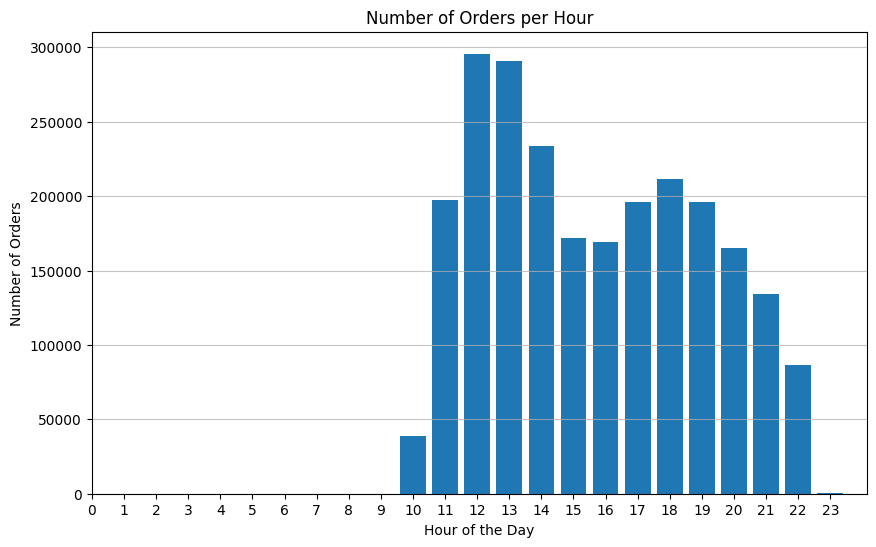

In [15]:
# prompt: Create a chart to display the best time of the day to do analysis. Best time of day is the time with most orders. Use the column DATETIME to identify the time.

import matplotlib.pyplot as plt

# Convert 'DATETIME' to datetime objects if it's not already
orders['DATETIME'] = pd.to_datetime(orders['DATETIME'])

# Extract the hour from the 'DATETIME' column
orders['HOUR'] = orders['DATETIME'].dt.hour

# Count the number of orders for each hour
hourly_orders = orders.groupby('HOUR')['ORDER_ID'].count()

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(hourly_orders.index, hourly_orders.values)
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Orders')
plt.title('Number of Orders per Hour')
plt.xticks(range(24))  # Ensure all 24 hours are displayed on the x-axis
plt.grid(axis='y', alpha=0.75)
plt.show()

## Busiest Day Analysis

- Analyzes order data to identify the busiest day of the week.  
- Visualizes the results in a bar chart for easy interpretation.  
- Helps pinpoint peak order days for operational optimization.  
- Enables restaurants to make informed decisions by understanding demand patterns.

<ipython-input-16-640526d3d153>:41: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_orders = orders.groupby('DAY_NAME')['ORDER_ID'].count()


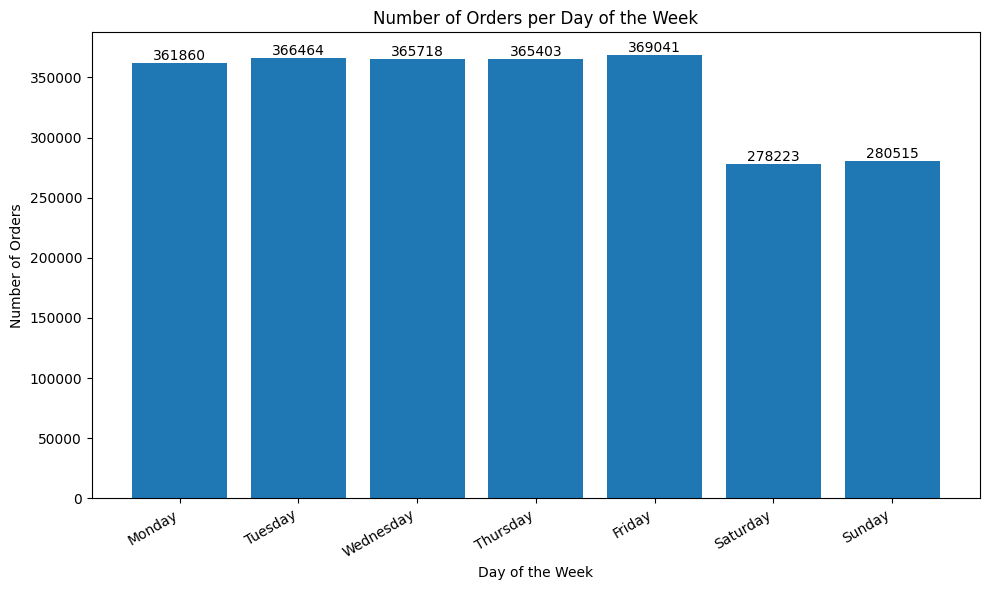

In [16]:
# prompt: Create a chart to display the best day of the week to do analysis. Best day of the week is the day with most orders. Use the column DATETIME to identify the date. Sort by Monday, Tuesday, Wednesday, Thursday, Friday, Saturday and Sunday. Include data labels on top of the chart

import pandas as pd
import matplotlib.pyplot as plt

# Load the pickle files
orders = pd.read_pickle('orders.pickle')
restaurants = pd.read_pickle('restaurants.pickle')
items = pd.read_pickle('items.pickle')

# Create a mapping from ITEM_ID to ITEM_NAME
item_mapping = items.set_index('ITEM_ID')['ITEM_NAME']
# Replace the ITEM_IDs in the columns with ITEM_NAME using the mapping
columns_to_replace = ['MAIN', 'BASE', 'SIDE_1', 'SIDE_2']
for column in columns_to_replace:
    orders[column] = orders[column].map(item_mapping)

# Merge the orders and restaurants DataFrames based on the RESTAURANT_ID column
orders = pd.merge(orders, restaurants, on='RESTAURANT_ID', how='left')
# Exclude columns 'DRINKS' and 'COOKIES'
orders = orders.drop(columns=['RESTAURANT_ID'], errors='ignore')

orders = orders.rename(columns={'NAME': 'RESTAURANT_NAME'})

# Convert the 'DATETIME' column to datetime objects if it's not already
orders['DATETIME'] = pd.to_datetime(orders['DATETIME'])

# Extract the day of the week (Monday=0, Sunday=6)
orders['DAY_OF_WEEK'] = orders['DATETIME'].dt.dayofweek

# Create the 'DAY_NAME' column using dt.day_name()
orders['DAY_NAME'] = orders['DATETIME'].dt.day_name()

# Define the desired order of days
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Ensure DAY_NAME is a categorical type with the specified order
orders['DAY_NAME'] = pd.Categorical(orders['DAY_NAME'], categories=days_order, ordered=True)

# Group by the day of the week and count the number of orders, now sorted by the categorical order
day_orders = orders.groupby('DAY_NAME')['ORDER_ID'].count()

# Create a bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(day_orders.index, day_orders.values)

# Add data labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.5, yval, ha='center', va='bottom')

plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')
plt.title('Number of Orders per Day of the Week')
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()


## Top 5 Most Sold Products Visualization

- Visualizes the top 5 most sold products in separate charts for `MAIN`, `BASE`, `SIDE_1`, and `SIDE_2` order categories.  
- Identifies popular product choices within each category.  
- Crucial for inventory management, menu optimization, and understanding customer preferences.  
- Helps businesses analyze sales patterns and make data-driven decisions to enhance efficiency and profitability.

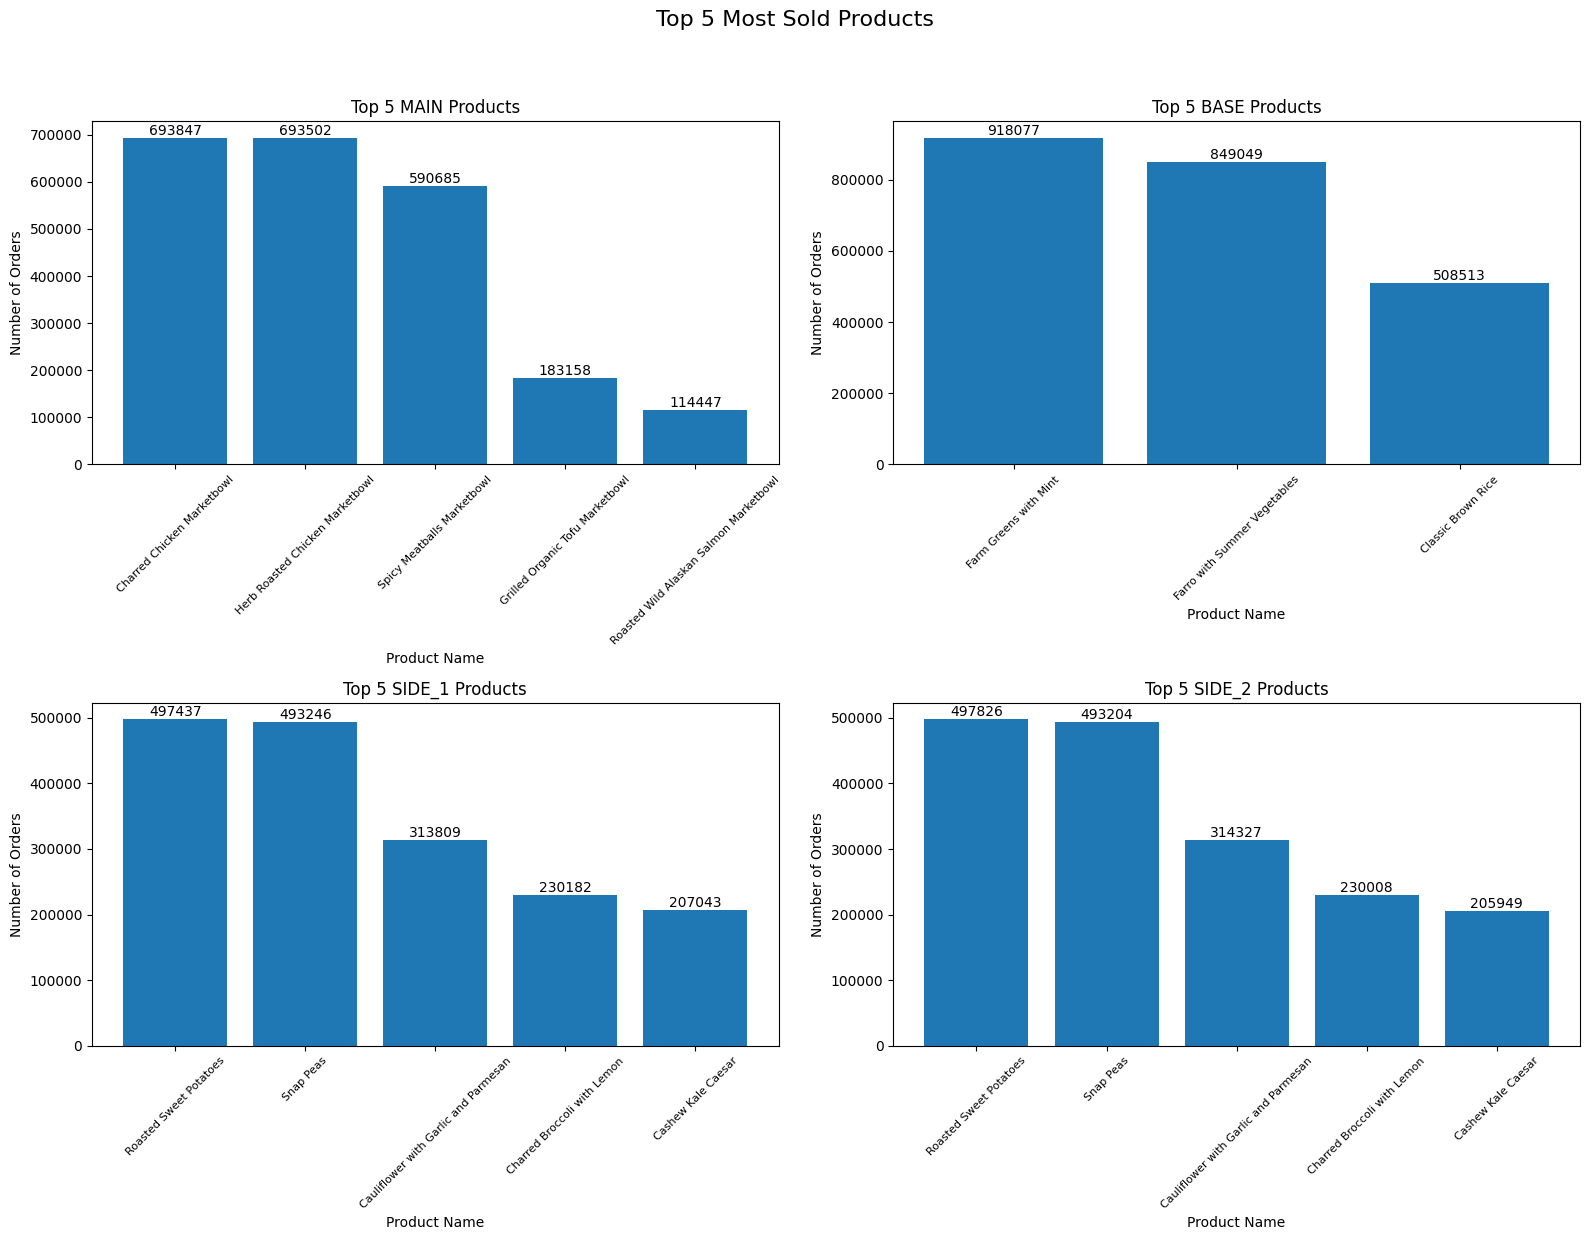

In [17]:
# prompt: Create a chart to display the top 5  most sold products to do analysis. Most sold products are products that appears the most on columns MAIN, BASE, SIDE_1 and SIDE_2. Create one chart for MAIN products, one for BASE,  one for SIDE_1 and one for SIDE_2. Add data labels on top of the bars

import matplotlib.pyplot as plt

# Count the occurrences of each product in the specified columns
product_counts = {}
for col in ['MAIN', 'BASE', 'SIDE_1', 'SIDE_2']:
    product_counts[col] = orders[col].value_counts().head(5)

# Create subplots for each column
fig, axes = plt.subplots(2, 2, figsize=(16, 13))
fig.suptitle('Top 5 Most Sold Products', fontsize=16)

columns = ['MAIN', 'BASE', 'SIDE_1', 'SIDE_2']
for i, ax in enumerate(axes.flatten()):
  col = columns[i]
  bars = ax.bar(product_counts[col].index, product_counts[col].values)
  ax.set_title(f'Top 5 {col} Products')
  ax.set_xlabel('Product Name')
  ax.set_ylabel('Number of Orders')
  ax.tick_params(axis='x', rotation=45, labelsize=8)
  for bar in bars:
      yval = bar.get_height()
      ax.text(bar.get_x() + bar.get_width()/2, yval + 0.5, int(yval), ha='center', va='bottom')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## Top 10 Restaurants by Orders

- Identifies and visualizes the top 10 restaurants with the highest number of orders.  
- Analyzes restaurant performance and popularity.  
- Crucial for business decisions such as marketing and resource allocation.  
- Displays results in a bar chart with data labels for a clear and informative overview.


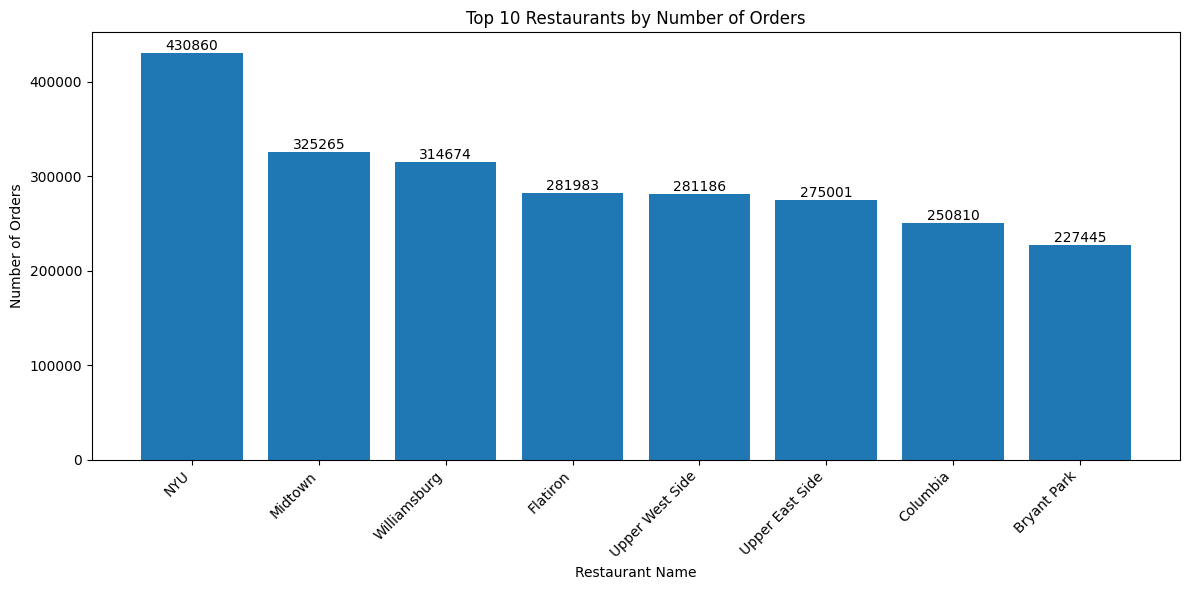

In [18]:
# prompt: Create a chart to identify the most common orders by RESTAURANT_NAME. Add data labels on top of the bars

import matplotlib.pyplot as plt

# Assuming 'orders' DataFrame is already loaded and processed as in your provided code

# Group by restaurant name and count orders
restaurant_orders = orders.groupby('RESTAURANT_NAME')['ORDER_ID'].count()

# Sort the restaurants by the number of orders in descending order and take top 10
top_restaurants = restaurant_orders.sort_values(ascending=False).head(10)

# Create the bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(top_restaurants.index, top_restaurants.values)

# Add data labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, int(yval), ha='center', va='bottom')

plt.xlabel('Restaurant Name')
plt.ylabel('Number of Orders')
plt.title('Top 10 Restaurants by Number of Orders')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

## Order Type Frequency Analysis

- Creates a bar chart to compare the frequency of different order types.  
- Categorizes orders using the `TYPE` column and visualizes their distribution.  
- Helps understand the popularity of various order types for better business insights.


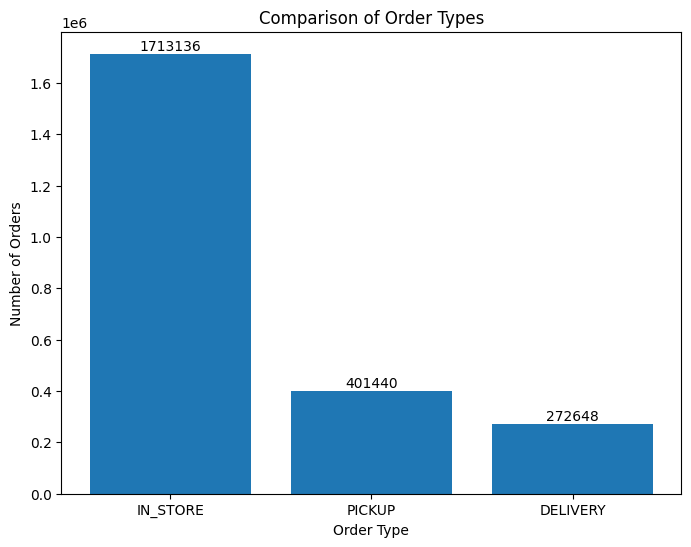

In [19]:
# prompt: Create a chart to compare order types using the column TYPE. Add data labels on top of the bars

import matplotlib.pyplot as plt

# Assuming 'orders' DataFrame is already loaded and processed

# Count the occurrences of each order type
order_type_counts = orders['TYPE'].value_counts()

# Create the bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(order_type_counts.index, order_type_counts.values)

# Add data labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, yval, ha='center', va='bottom')

plt.xlabel('Order Type')
plt.ylabel('Number of Orders')
plt.title('Comparison of Order Types')
plt.show()

## Restaurant and University Location Analysis

- Plots restaurant and university locations on a scatter plot.  
- Aims to visually identify potential correlations between restaurant locations and university locations.  
- Helps observe distribution patterns for business analysis, marketing strategies, and location planning.


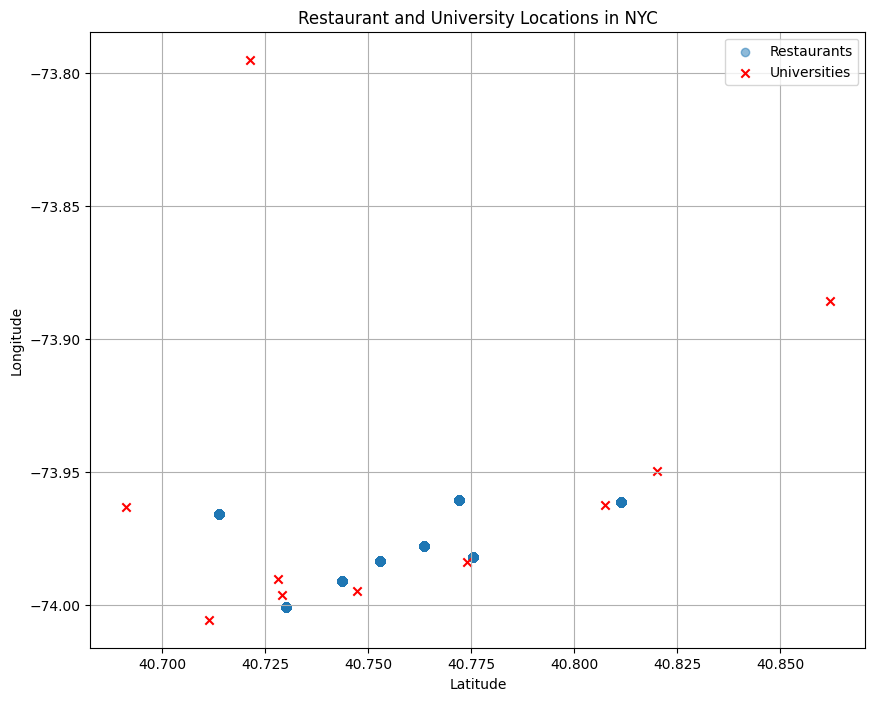

In [20]:
# prompt: The orders data frame display information of orders from different restaurants in New York City. I want to identify if the location of the restaurants using the map coordinates (LAT and LONG columns) are influenced by location of universities in New York City. To identify the coordinates (LAT and LONG columns) of the universities in New York City, use universities.

import matplotlib.pyplot as plt

# Assuming 'orders' and 'universities' DataFrames are already loaded

# Create a scatter plot of restaurant locations
plt.figure(figsize=(10, 8))
plt.scatter(orders['LAT'], orders['LONG'], label='Restaurants', alpha=0.5)

# Add markers for university locations
plt.scatter(universities['LAT'], universities['LONG'], color='red', marker='x', label='Universities')

# Customize the plot
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Restaurant and University Locations in NYC')
plt.legend()
plt.grid(True)
plt.show()

In [21]:
# Display or save the updated DataFrame
print(orders.head())

   ORDER_ID            DATETIME      TYPE  DRINKS  COOKIES  \
0  O1820060 2018-10-11 17:25:50  IN_STORE     1.0      2.0   
1  O1011112 2018-05-31 11:35:00  IN_STORE     0.0      0.0   
2   O752854 2018-04-21 18:12:57  DELIVERY     0.0      2.0   
3  O2076864 2018-11-17 12:50:52    PICKUP     1.0      0.0   
4  O1988898 2018-11-04 18:37:24  IN_STORE     0.0      0.0   

                         MAIN                          BASE  \
0                         NaN                           NaN   
1                         NaN                           NaN   
2  Charred Chicken Marketbowl  Farro with Summer Vegetables   
3  Charred Chicken Marketbowl            Classic Brown Rice   
4  Spicy Meatballs Marketbowl  Farro with Summer Vegetables   

                     SIDE_1                           SIDE_2 RESTAURANT_NAME  \
0                       NaN                              NaN         Midtown   
1                       NaN                              NaN     Bryant Park   
2       